<h1>Page 25</h1>

In [2]:
# Use this package to read .rda datasets
import pyreadr # pip install pyreader

In [3]:
# Reading a gavote dataset
wcgs = pyreadr.read_r('data/wcgs.rda')['wcgs']

In [4]:
wcgs

,age,height,weight,sdp,dbp,chol,behave,cigs,dibep,chd,typechd,timechd,arcus
0,49,73,150,110,76,225,A2,25,A,no,none,1664,absent
1,42,70,160,154,84,177,A2,20,A,no,none,3071,present
2,42,69,160,110,78,181,B3,0,B,no,none,3071,absent
3,41,68,152,124,78,132,B4,20,B,no,none,3064,absent
4,59,70,150,144,86,255,B3,20,B,yes,infdeath,1885,present
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,41,70,173,124,78,215,A2,0,A,no,none,3056,absent
3150,45,69,200,144,82,261,B3,0,B,no,none,3056,absent
3151,50,70,165,122,82,242,A2,50,A,no,none,2383,present
3152,39,68,168,126,76,213,B3,0,B,no,none,3053,absent


In [5]:
# We start by focusing on just three of the variables in the dataset
wcgs[['chd','height','cigs']].describe(include = 'all')

,chd,height,cigs
count,3154,3154.000000,3154.000000
unique,2,NaN,NaN
top,no,NaN,NaN
freq,2897,NaN,NaN
mean,NaN,69.777743,11.600507
std,NaN,2.528693,14.517579
min,NaN,60.000000,0.000000
25%,NaN,68.000000,0.000000
50%,NaN,70.000000,0.000000
75%,NaN,72.000000,20.000000


In [6]:
# In this chapter we are going to use seaborn library to plot any chart
import seaborn as sns 


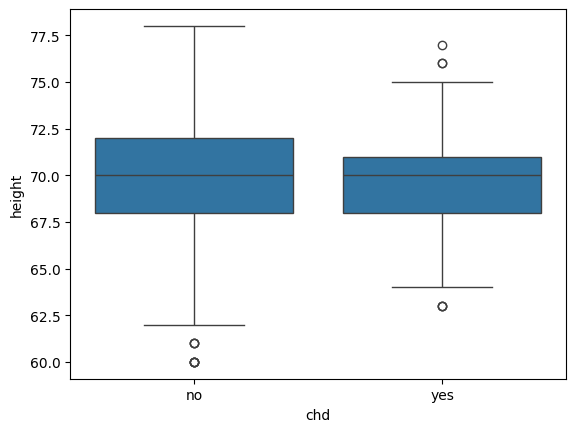

In [7]:
# Plot a boxplot - to show the similarity in the distribution of heights of the two groups of men with and without heart disease
sns.boxplot(data=wcgs,
            x ='chd',
            y = 'height');

In [8]:
# We convert the absence/presence of disease into a numerical 0/1 variable
wcgs['y'] = wcgs['chd'].cat.codes
        

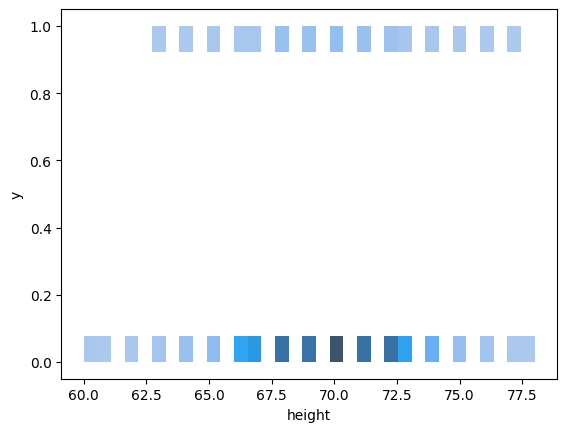

In [9]:
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'height');

<h1> Page 26 </h1>

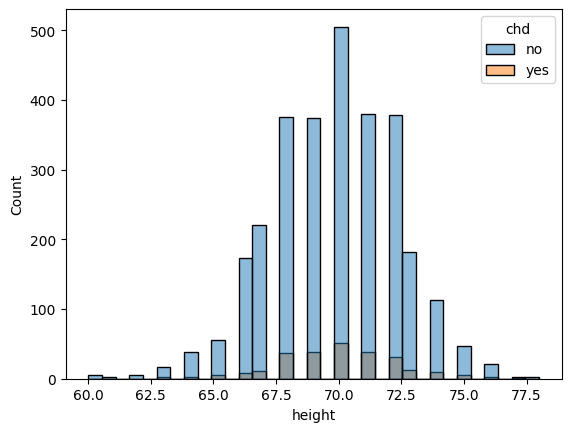

In [10]:
# Plot a histogram - Count height distribution usage for men with and without heart disease.
sns.histplot(data=wcgs,
             x = 'height',
             hue = 'chd');

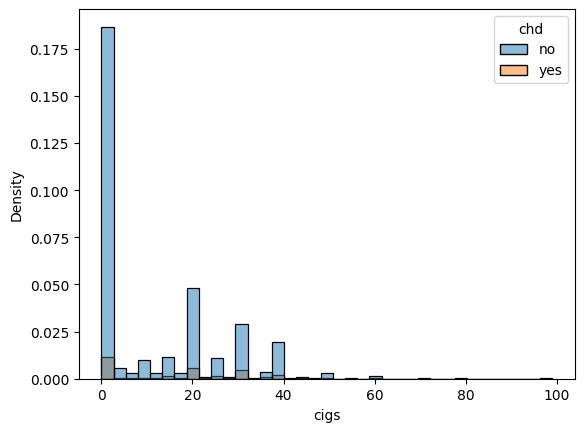

In [11]:
# Plot a histogram - Density cigarette distribution for men with and without heart disease.
sns.histplot(data=wcgs,
             x = 'cigs',
             hue = 'chd',
             stat='density');

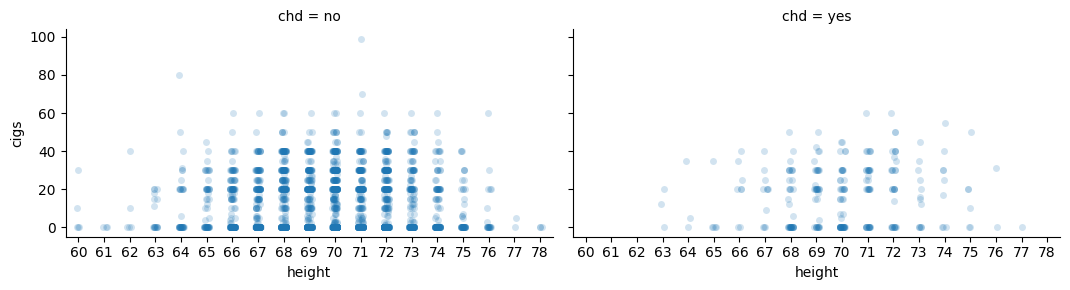

In [12]:
# Stripplot - Height and cigarette consumption for men without heart disease on the left and with heart diseas on the right.
sns.FacetGrid(data=wcgs,
              col='chd',
              aspect=1.8).map(
                  sns.stripplot, 
                  "height", 
                  "cigs", 
                  jitter=True, 
                  alpha=0.2,
                  order = None);

<h1>Page 28 </h1>

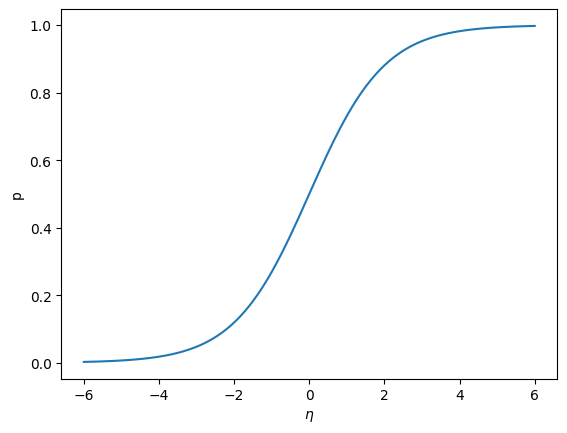

In [25]:
# A Logistic relationship between the probability of the response, p, and the linear predictor, n
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # expit is the logistic function

# Define the range for x
x = np.linspace(-6, 6, 400)

# Calculate the logistic function values
y = expit(x)

# Create the plot
plt.plot(x,y)
plt.xlabel("$\eta$")
plt.ylabel("p");

<h1>Page 29 </h1>

In [54]:
# The Generalized Linear Model (GLM) with the binomial link function
import statsmodels.formula.api as smf

lmod = smf.logit(data = wcgs,
           formula = "y~height+cigs").fit();

Optimization terminated successfully.
         Current function value: 0.277275
         Iterations 7


In [60]:
# We can examine the standard summary output
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3154
Model:                          Logit   Df Residuals:                     3151
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                 0.01807
Time:                        00:31:40   Log-Likelihood:                -874.52
converged:                       True   LL-Null:                       -890.62
Covariance Type:            nonrobust   LLR p-value:                 1.021e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5016      1.842     -2.444      0.015      -8.112      -0.892
height         0.0252      0.026      0.957      0.338      -0.026       0.077
cigs           0.0231      0.004      5.724      0.000       0.015       0.031
==============================================================================
"""

<h1>Page 30 </h1>

In [64]:
# Extract the coefficients
lmod.params

Intercept   -4.501614
height       0.025208
cigs         0.023127
dtype: float64

In [94]:
constant = lmod.params.Intercept
beta1 = lmod.params.height
beta2 = lmod.params.cigs

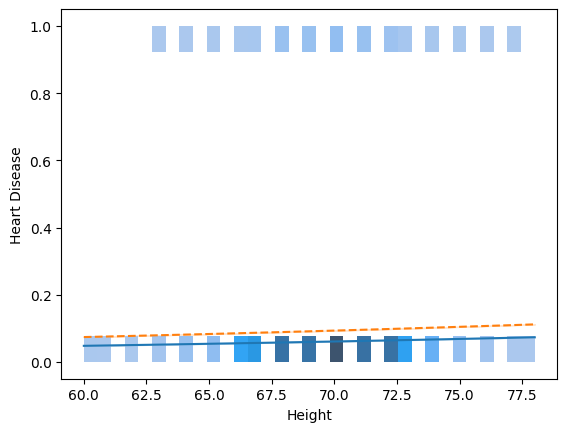

In [113]:
# Height
x = wcgs['height']

# Vary the height for the nonsmokers
nonsmokers = constant+beta1*x+beta2*0 

# Vary the height for the 20 day smokers
smokers = constant+beta1*x+beta2*20

# Solid line represent nonsmokers
sns.lineplot(x = x,
             y = expit(nonsmokers))
# Dashed line ia pack-a-day smoker
sns.lineplot(x = x,
             y = expit(smokers), 
             linestyle='--')
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'height')
plt.xlabel("Height")
plt.ylabel("Heart Disease");


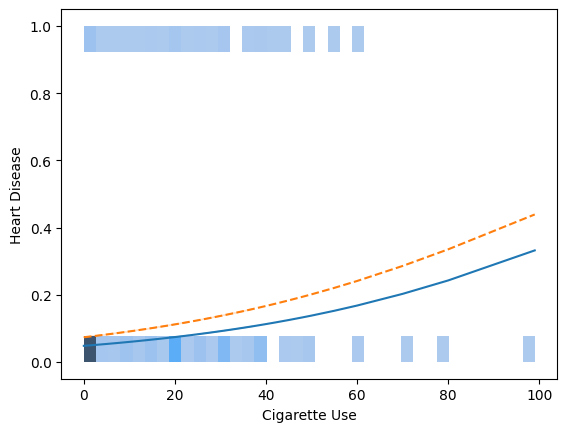

In [114]:
# Cigarette
x = wcgs['cigs']

# Vary the cigarette for the 60 inch tall man
short_man = constant+beta1*60+beta2*x

# Vary the cigarette for the 78 inch tall man
tall_man = constant+beta1*78+beta2*x

# Solid line represent a very short man (60 in. tall)
sns.lineplot(x = x,
             y = expit(short_man))
# Dashed line a very tall man (78 in. tall)
sns.lineplot(x = x,
             y = expit(tall_man), 
             linestyle='--')
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'cigs')
plt.xlabel("Cigarette Use")
plt.ylabel("Heart Disease");
